# Identify customer segments for online retail with the use of K-means clustering

# 1. Loading the dataset

In [90]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_excel("D:\Reatail Data\Dataset_Identify customer segments for online retail with the use of K-means clustering (1)\Online Retail.xlsx")

# 2. Understanding The Data

In [3]:
# Explore basic information about the dataset
print("Head of the dataset:")
print(data.head())

Head of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Optionally, you can drop or handle missing values if necessary
# Example: Drop rows with missing values
data_cleaned = data.dropna()
print("\nDataset after handling missing values:")
print(data_cleaned.info())


Dataset after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


# 3. Clean The Data

### Handle missing values by either dropping or filling them.

In [8]:
# Handle missing values
# Option 1: Drop rows with missing values
data_dropped = data.dropna()

In [9]:
print("\nData after dropping missing values:")
print(data_dropped.info())


Data after dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


In [10]:
# Option 2: Fill missing values
# Example: Fill missing numerical values with the mean
data_filled = data.copy()
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data_filled[column].fillna(data[column].mean(), inplace=True)
    else:
        data_filled[column].fillna("Unknown", inplace=True)

In [11]:
print("\nData after filling missing values:")
print(data_filled.info())



Data after filling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [12]:
# Decide which cleaned dataset to use for further analysis
# data_cleaned = data_dropped  # if dropping missing values
# OR
data_cleaned = data_filled  # if filling missing values

In [13]:
print("\nFinal cleaned dataset:")
print(data_cleaned.head())


Final cleaned dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Code to Remove Duplicates

In [14]:
# Remove duplicate entries
data_no_duplicates = data_cleaned.drop_duplicates()

print("\nData after removing duplicates:")
print(f"Number of duplicate rows removed: {len(data_cleaned) - len(data_no_duplicates)}")
print(data_no_duplicates.info())

# Update the cleaned dataset for further analysis
data_cleaned = data_no_duplicates


Data after removing duplicates:
Number of duplicate rows removed: 5268
<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB
None


### Steps to Correct Data Types

In [15]:
# Check data types
print("\nInitial data types:")
print(data_cleaned.dtypes)


Initial data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [91]:
# Example of correcting data types:
# Convert 'InvoiceDate' to datetime
if 'InvoiceDate' in data_cleaned.columns:
    data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], errors='coerce')

In [92]:
# Convert 'CustomerID' to integer if necessary
if 'CustomerID' in data_cleaned.columns:
    data_cleaned['CustomerID'] = pd.to_numeric(data_cleaned['CustomerID'], errors='coerce')

In [93]:
# Convert other numeric columns if stored as objects
for column in data_cleaned.select_dtypes(include=['object']).columns:
    # Attempt numeric conversion if column contains only numbers
    try:
        data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='ignore')
    except ValueError:
        pass

In [19]:
# Recheck data types
print("\nData types after correction:")
print(data_cleaned.dtypes)


Data types after correction:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [20]:
# Handle any rows with invalid conversions (e.g., NaN from 'coerce')
data_cleaned = data_cleaned.dropna(subset=['InvoiceDate', 'CustomerID'])

In [21]:
print("\nData after handling invalid conversions:")
print(data_cleaned.info())


Data after handling invalid conversions:
<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB
None


# 4. Transform the Data:.

### Normalize or standardize the data..

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
# Select numerical features for transformation
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

In [24]:
# Standardize the data
scaler = StandardScaler()
data_standardized = data_cleaned.copy()
data_standardized[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

In [25]:
print("\nStandardized data (first 5 rows):")
print(data_standardized[numerical_features].head())


Standardized data (first 5 rows):
   Quantity  UnitPrice  CustomerID
0 -0.016520  -0.021419    1.731368
1 -0.016520  -0.012780    1.731368
2 -0.007393  -0.019362    1.731368
3 -0.016520  -0.012780    1.731368
4 -0.016520  -0.012780    1.731368


In [26]:
# OR Normalize the data
# scaler = MinMaxScaler()
# data_normalized = data_cleaned.copy()
# data_normalized[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# print("\nNormalized data (first 5 rows):")
# print(data_normalized[numerical_features].head())

# Use the standardized or normalized data for clustering
data_preprocessed = data_standardized  # or data_normalized

### Encode categorical variables.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# Identify categorical features
categorical_features = data_cleaned.select_dtypes(include=['object']).columns

In [29]:
# Check the number of unique values for each categorical feature
unique_counts = data_cleaned[categorical_features].nunique()
print("\nUnique counts for categorical features:")
print(unique_counts)


Unique counts for categorical features:
InvoiceNo      25900
StockCode       4070
Description     4224
Country           38
dtype: int64


In [30]:
# Filter out high-cardinality features (e.g., > 100 unique values)
low_cardinality_features = unique_counts[unique_counts <= 100].index
high_cardinality_features = unique_counts[unique_counts > 100].index

In [31]:
print("\nLow-cardinality features for one-hot encoding:")
print(low_cardinality_features)


Low-cardinality features for one-hot encoding:
Index(['Country'], dtype='object')


In [32]:
print("\nHigh-cardinality features excluded from one-hot encoding:")
print(high_cardinality_features)


High-cardinality features excluded from one-hot encoding:
Index(['InvoiceNo', 'StockCode', 'Description'], dtype='object')


In [33]:
# Apply one-hot encoding to low-cardinality features only
data_encoded = pd.get_dummies(data_cleaned, columns=low_cardinality_features, drop_first=True)

In [34]:
# Retain high-cardinality features as-is or drop them based on context
data_encoded = data_encoded.drop(columns=high_cardinality_features, errors='ignore')

In [35]:
print("\nData after handling high-cardinality features:")
print(data_encoded.info())


Data after handling high-cardinality features:
<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Quantity                      536641 non-null  int64         
 1   InvoiceDate                   536641 non-null  datetime64[ns]
 2   UnitPrice                     536641 non-null  float64       
 3   CustomerID                    536641 non-null  float64       
 4   Country_Austria               536641 non-null  bool          
 5   Country_Bahrain               536641 non-null  bool          
 6   Country_Belgium               536641 non-null  bool          
 7   Country_Brazil                536641 non-null  bool          
 8   Country_Canada                536641 non-null  bool          
 9   Country_Channel Islands       536641 non-null  bool          
 10  Country_Cyprus                536641 

In [102]:
from scipy import stats

In [103]:
# Select numerical features for outlier detection
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

In [105]:
# Calculate Z-scores
z_scores = stats.zscore(data_cleaned[numerical_features])

In [106]:
# Set a threshold for Z-score (common threshold is 3 or -3)
threshold = 3

In [107]:
# Identify outliers (where Z-score > 3 or < -3)
outliers = (abs(z_scores) > threshold).all(axis=1)

In [108]:
# Remove outliers from the dataset
data_no_outliers_zscore = data_cleaned[~outliers]

In [109]:
print("\nData after removing outliers using Z-score method:")
print(data_no_outliers_zscore.shape)


Data after removing outliers using Z-score method:
(536641, 14)


In [110]:
# Calculate the IQR for each numerical column
Q1 = data_cleaned[numerical_features].quantile(0.25)
Q3 = data_cleaned[numerical_features].quantile(0.75)
IQR = Q3 - Q1

In [111]:
# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [112]:
# Identify rows where any value is outside the IQR range for any feature
outliers_iqr = ((data_cleaned[numerical_features] < lower_bound) | (data_cleaned[numerical_features] > upper_bound)).any(axis=1)

In [113]:
# Remove outliers from the dataset
data_no_outliers_iqr = data_cleaned[~outliers_iqr]

In [114]:
print("\nData after removing outliers using IQR method:")
print(data_no_outliers_iqr.shape)


Data after removing outliers using IQR method:
(426492, 14)


In [115]:
# Plot boxplot for each numerical feature to detect outliers
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

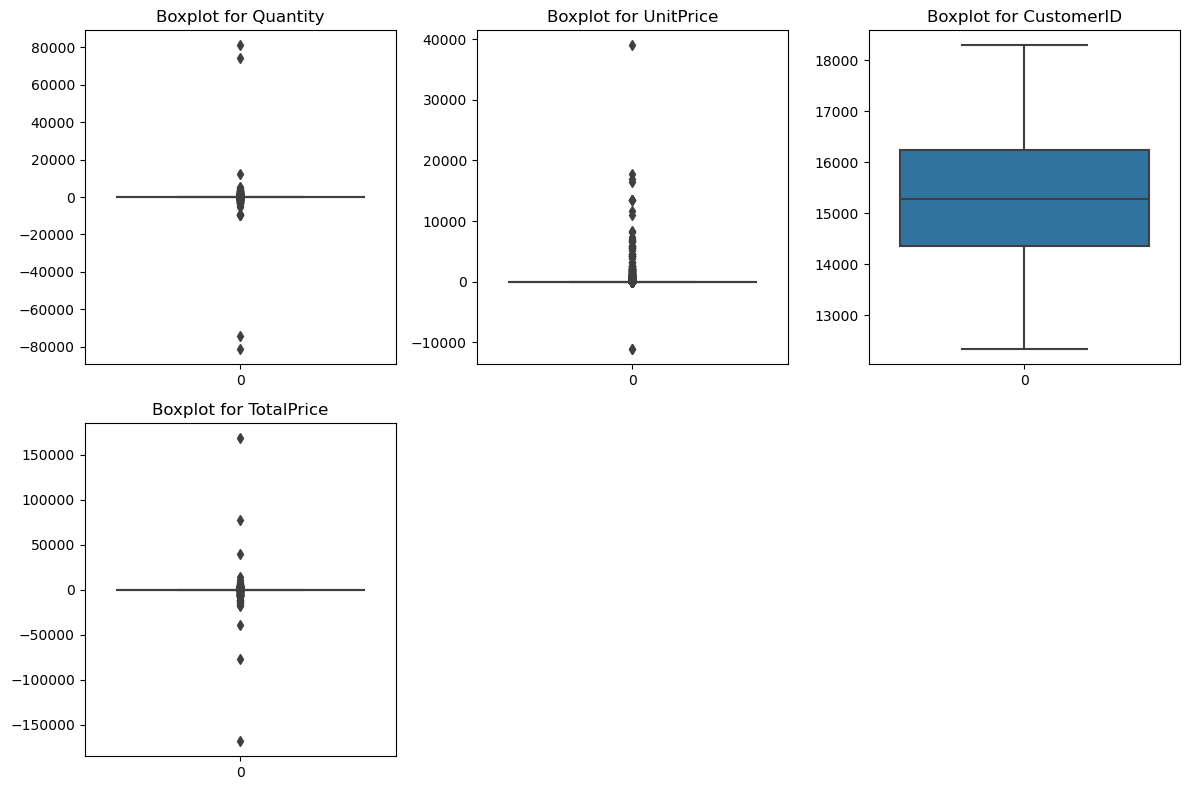

In [116]:
# Create boxplots for all numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)  # Create subplots
    sns.boxplot(data_cleaned[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

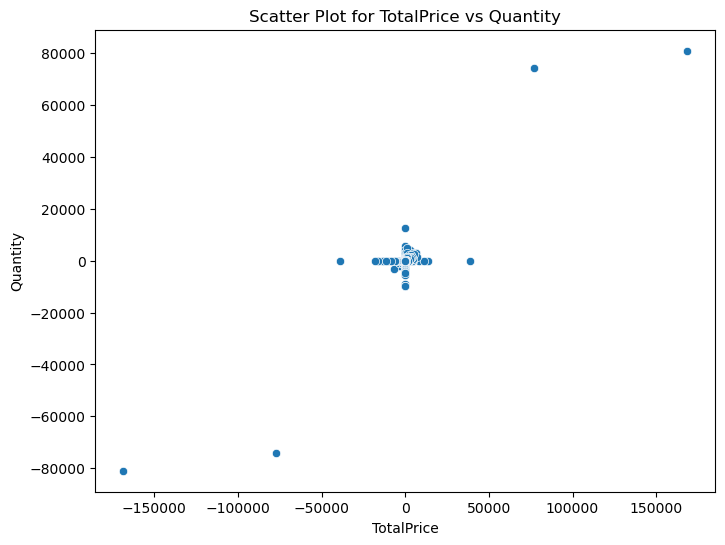

In [117]:
# Scatter plot to check for outliers in two selected numerical features
# Let's take two features as an example: 'TotalPrice' and 'Quantity'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['TotalPrice'], y=data_cleaned['Quantity'])
plt.title('Scatter Plot for TotalPrice vs Quantity')
plt.xlabel('TotalPrice')
plt.ylabel('Quantity')
plt.show()

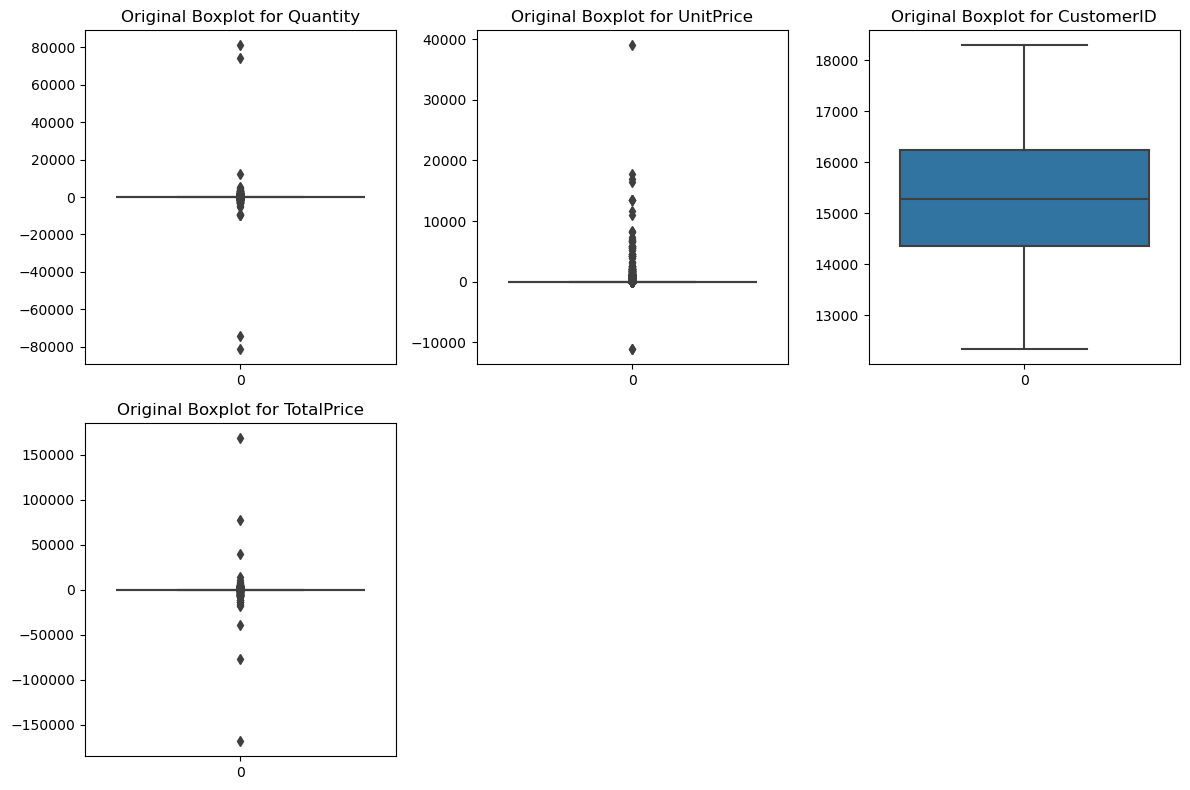

In [118]:
# Visualize data before and after removing outliers
# Boxplot for original data
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.boxplot(data_cleaned[feature])
    plt.title(f'Original Boxplot for {feature}')
plt.tight_layout()
plt.show()

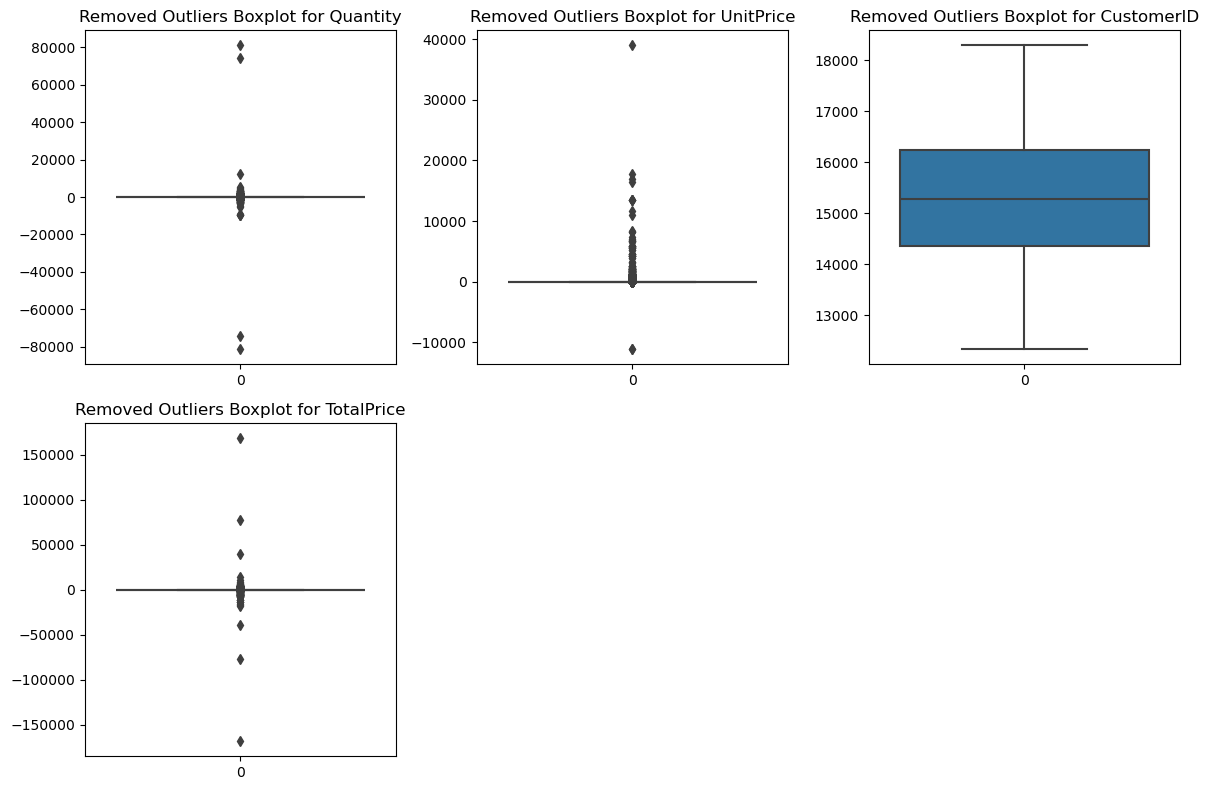

In [119]:
# Boxplot for data after removing outliers (using Z-score or IQR method)
# Here, assume 'data_no_outliers_zscore' is the cleaned data after outlier removal
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.boxplot(data_no_outliers_zscore[feature])  # Or use 'data_no_outliers_iqr'
    plt.title(f'Removed Outliers Boxplot for {feature}')
plt.tight_layout()
plt.show()

# 5. Feature Engineering:

### Create new features based on existing ones.

In [36]:
# Create a new feature for total price per transaction
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [37]:
# Extract features from the InvoiceDate
if 'InvoiceDate' in data_cleaned.columns:
    data_cleaned['InvoiceYear'] = data_cleaned['InvoiceDate'].dt.year
    data_cleaned['InvoiceMonth'] = data_cleaned['InvoiceDate'].dt.month
    data_cleaned['InvoiceDay'] = data_cleaned['InvoiceDate'].dt.day
    data_cleaned['InvoiceWeekday'] = data_cleaned['InvoiceDate'].dt.weekday
    data_cleaned['InvoiceHour'] = data_cleaned['InvoiceDate'].dt.hour

In [38]:
# Create customer-level features
if 'CustomerID' in data_cleaned.columns:
    customer_features = data_cleaned.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (data_cleaned['InvoiceDate'].max() - x.max()).days,  # Recency
        'InvoiceNo': 'count',  # Frequency
        'TotalPrice': 'sum'    # Monetary
    }).rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalPrice': 'Monetary'
    }).reset_index()

In [39]:
print("\nCustomer-level features (RFM):")
print(customer_features.head())


Customer-level features (RFM):
   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1        182   4310.00
2     12348.0       74         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      309         17    334.40


In [40]:
# Updated dataset
print("\nData after feature engineering:")
print(data_cleaned.head())


Data after feature engineering:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   InvoiceYear  InvoiceMonth  InvoiceDay  InvoiceWeekday  InvoiceHour  
0    

In [41]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

In [42]:
# Ensure that we only work with numerical data for feature selection
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data_cleaned[numerical_features]

In [43]:
print("\nNumerical columns selected for feature selection:")
print(data_numerical.columns)


Numerical columns selected for feature selection:
Index(['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice'], dtype='object')


In [44]:
# 1. Variance Threshold: Remove features with low variance
selector = VarianceThreshold(threshold=0.01)  # Features with variance less than 0.01 will be removed
data_high_variance = selector.fit_transform(data_numerical)

In [45]:
print("\nFeatures retained after variance thresholding:")
print(data_numerical.columns[selector.get_support()])


Features retained after variance thresholding:
Index(['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice'], dtype='object')


In [46]:
# 2. Principal Component Analysis (PCA) for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
data_pca = pca.fit_transform(data_high_variance)

In [47]:
print("\nExplained variance by each principal component:")
print(pca.explained_variance_ratio_)


Explained variance by each principal component:
[0.91571217 0.07706608]


In [48]:
# Final dataset for clustering
data_for_clustering = pd.DataFrame(data_high_variance, columns=data_numerical.columns[selector.get_support()])
print("\nFinal selected features for clustering:")
print(data_for_clustering.head())


Final selected features for clustering:
   Quantity  UnitPrice  CustomerID  TotalPrice
0       6.0       2.55     17850.0       15.30
1       6.0       3.39     17850.0       20.34
2       8.0       2.75     17850.0       22.00
3       6.0       3.39     17850.0       20.34
4       6.0       3.39     17850.0       20.34


### Perform feature selection to identify the most relevant features.

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Select only numerical features for correlation matrix and feature selection
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

In [97]:
# Compute correlation matrix on numeric features only
correlation_matrix = data_cleaned[numerical_features].corr()

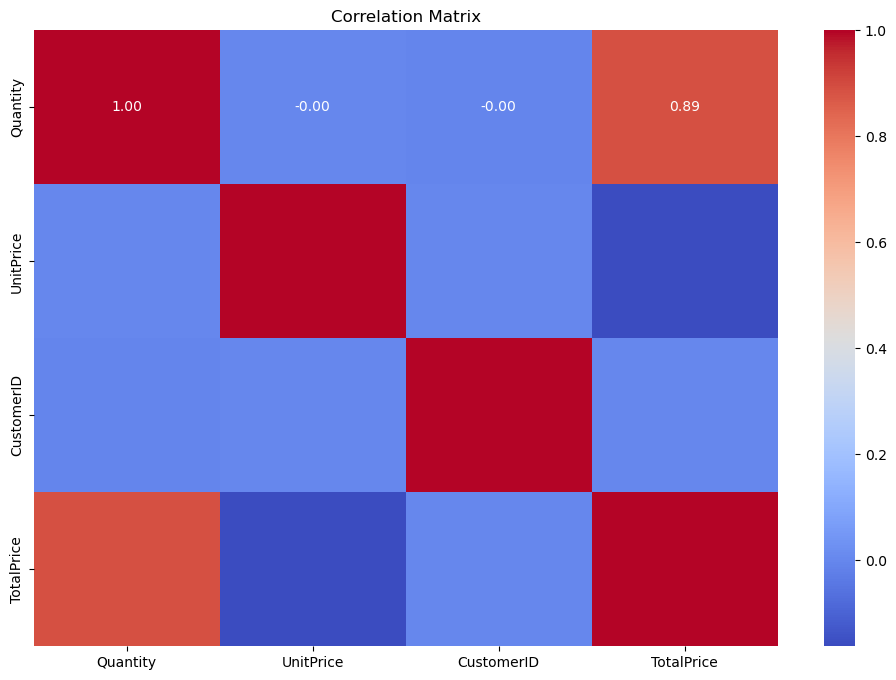

In [98]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [99]:
# Identify highly correlated features (threshold > 0.9 or < -0.9)
threshold = 0.9
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [100]:
print(f"\nHighly correlated features (above {threshold} correlation):")
print(correlated_features)


Highly correlated features (above 0.9 correlation):
set()


In [101]:
# Drop highly correlated features
data_cleaned_reduced = data_cleaned.drop(columns=correlated_features)

print("\nData after removing highly correlated features:")
print(data_cleaned_reduced.head())


Data after removing highly correlated features:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   InvoiceYear  InvoiceMonth  InvoiceDay  InvoiceWeekday  Inv

# Code for K-means Clustering

In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')


In [52]:
# Step 1: Feature Selection

# Drop non-numeric columns that are not relevant for clustering
data_numeric = data_cleaned.select_dtypes(include=['float64', 'int64'])

In [53]:
# Remove highly correlated features (threshold 0.9)
correlation_matrix = data_numeric.corr()
correlated_features = set()

In [54]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            correlated_features.add(correlation_matrix.columns[i])

In [55]:
# Drop highly correlated features
data_selected = data_numeric.drop(columns=list(correlated_features))

In [56]:
# Apply Variance Threshold (remove features with low variance)
selector = VarianceThreshold(threshold=0.01)
data_high_variance = selector.fit_transform(data_selected)

In [57]:
# Data after feature selection
selected_columns = data_selected.columns[selector.get_support()]
data_for_clustering = pd.DataFrame(data_high_variance, columns=selected_columns)

In [58]:
print("\nSelected features after variance thresholding:")
print(data_for_clustering.head())


Selected features after variance thresholding:
   Quantity  UnitPrice  CustomerID  TotalPrice
0       6.0       2.55     17850.0       15.30
1       6.0       3.39     17850.0       20.34
2       8.0       2.75     17850.0       22.00
3       6.0       3.39     17850.0       20.34
4       6.0       3.39     17850.0       20.34


In [59]:
# Step 2: Apply K-means Clustering

# Standardize the data (important for K-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [60]:
# Choose the number of clusters (k), e.g., 3 clusters (adjust based on your needs)
kmeans = KMeans(n_clusters=3, random_state=42)

In [89]:
# Fit the model
data_for_clustering['Cluster'] = kmeans.fit_predict(data_scaled)

In [62]:
print("\nCluster assignment for first few rows:")
print(data_for_clustering.head())


Cluster assignment for first few rows:
   Quantity  UnitPrice  CustomerID  TotalPrice  Cluster
0       6.0       2.55     17850.0       15.30        0
1       6.0       3.39     17850.0       20.34        0
2       8.0       2.75     17850.0       22.00        0
3       6.0       3.39     17850.0       20.34        0
4       6.0       3.39     17850.0       20.34        0


In [63]:
# Optionally: Analyze cluster centers
print("\nCluster centers:")
print(kmeans.cluster_centers_)


Cluster centers:
[[ 3.27230683e-07  2.35548025e-07  4.45797144e-06  3.54893078e-07]
 [ 3.54106681e+02 -3.16009464e-02 -5.98078105e-01  3.22623328e+02]
 [-3.54194483e+02 -3.16009464e-02 -5.98078105e-01 -3.22718553e+02]]


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [65]:
# Step 1: Visualize the clusters in 2D using PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [66]:
# Create a DataFrame with the PCA components and cluster labels
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = data_for_clustering['Cluster']

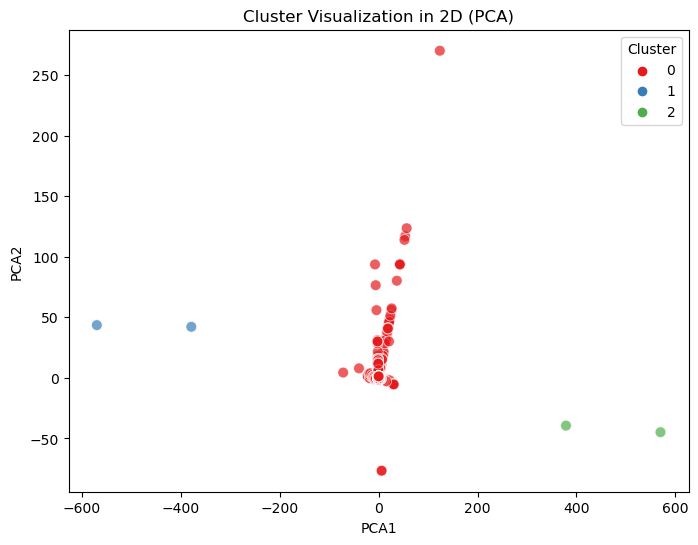

In [70]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_pca_df, palette='Set1', s=60, alpha=0.7)
plt.title('Cluster Visualization in 2D (PCA)')
plt.show()

In [80]:
# Step 2: Visualize clusters in 3D

# Apply PCA to reduce to 3D for 3D visualization
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_scaled)

In [72]:
# Create a DataFrame with the 3D PCA components and cluster labels
data_pca_3d_df = pd.DataFrame(data_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
data_pca_3d_df['Cluster'] = data_for_clustering['Cluster']

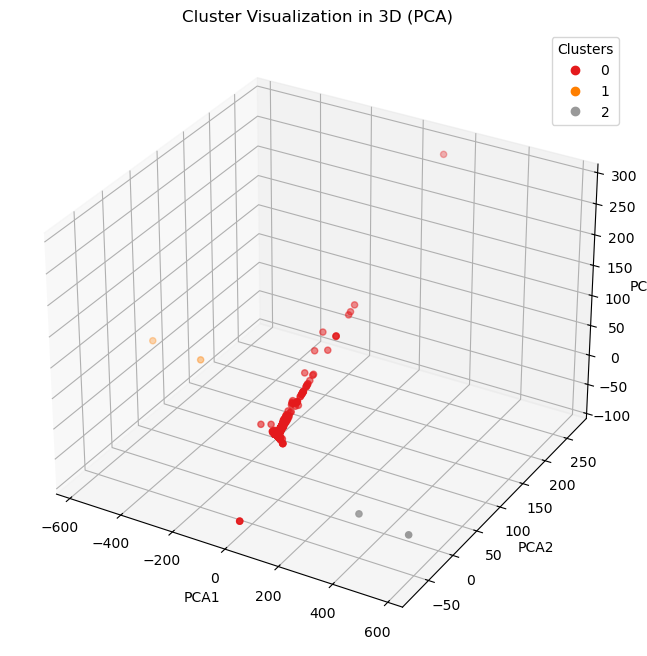

In [73]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_3d_df['PCA1'], data_pca_3d_df['PCA2'], data_pca_3d_df['PCA3'], c=data_pca_3d_df['Cluster'], cmap='Set1')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Cluster Visualization in 3D (PCA)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [74]:
# Step 3: Analyze the cluster centers
print("\nCluster centers (centroids):")
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=selected_columns)
print(cluster_centers_df)


Cluster centers (centroids):
       Quantity     UnitPrice  CustomerID    TotalPrice
0  3.272307e-07  2.355480e-07    0.000004  3.548931e-07
1  3.541067e+02 -3.160095e-02   -0.598078  3.226233e+02
2 -3.541945e+02 -3.160095e-02   -0.598078 -3.227186e+02


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


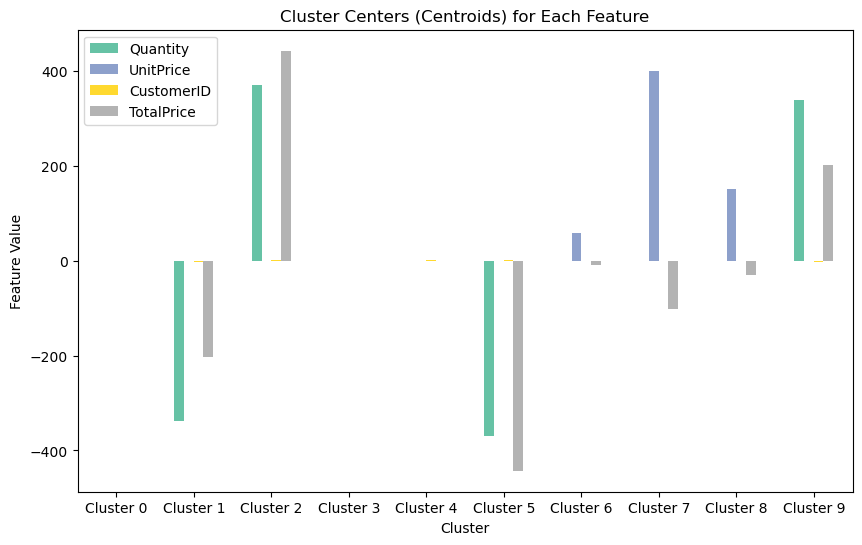

In [86]:
# Plotting the cluster centers for interpretation (using bar plot for each feature)
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=selected_columns)
cluster_centers_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Cluster Centers (Centroids) for Each Feature')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(range(len(cluster_centers_df)), [f"Cluster {i}" for i in range(len(cluster_centers_df))], rotation=0)
plt.show()

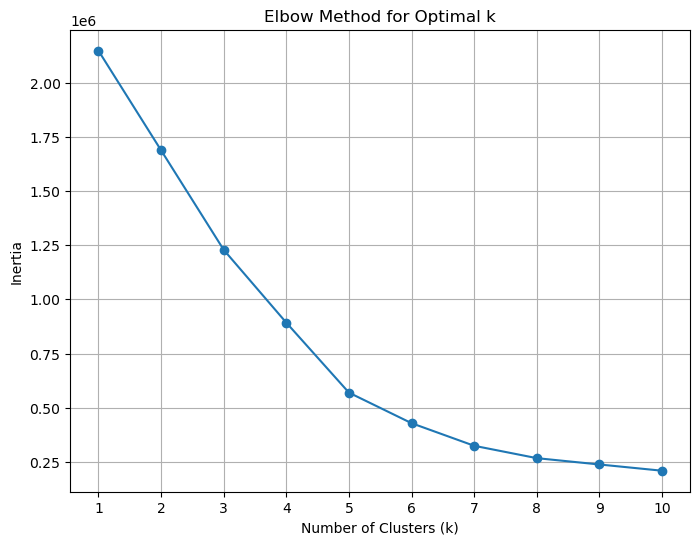

In [87]:
# Elbow Method for Optimal K
inertia = []
k_range = range(1, 11)  # Test with k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()